In [1]:
## CSCI Final Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [3]:
#Loads the excel file
df = pd.read_csv('Stock Market Data CSCI 3656.csv')

#Indexing into columns to save the specific data
sp500 = df['S&P_500_Price'].str.replace(',', '').astype(float)


#Can do it for others, wont be that different however. 
nasdaq = df['Nasdaq_100_Price']
gold = df['Gold_Price']
apple = df['Apple_Price']
nvidia = df['Nvidia_Price']


print(sp500)

0       4958.61
1       4906.19
2       4848.87
3       4924.97
4       4927.93
         ...   
1238    2707.88
1239    2706.05
1240    2731.61
1241    2737.70
1242    2724.87
Name: S&P_500_Price, Length: 1243, dtype: float64


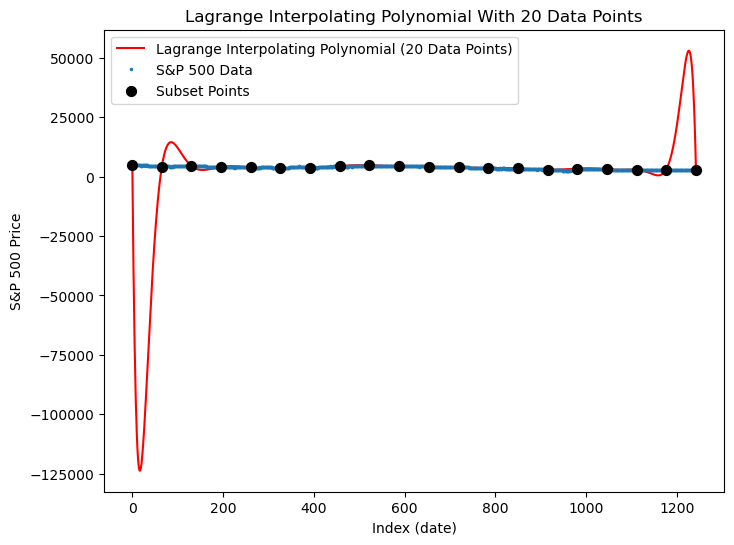

In [4]:
#Lagrange polynomial interpolation (Using a subset of the data)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#extracts from pds
x = np.array(range(len(df)))
y = sp500.values  

#Subset is how many points cant really do more then 15. Index splits our data into even amount. 
subset = 20
indices = np.linspace(0, len(x) - 1, subset, dtype=int)
x_subset = x[indices]
y_subset = y[indices]

lagrange_poly = lagrange(x_subset, y_subset)
x_pts = np.linspace(min(x_subset), max(x_subset), 1000)
y_pts = lagrange_poly(x_pts)


plt.figure(figsize=(8, 6))
plt.plot(x_pts, y_pts, label='Lagrange Interpolating Polynomial (20 Data Points)', color='red')
plt.plot(x, y, 'o', label='S&P 500 Data', markersize = 1.5)
plt.scatter(x_subset, y_subset, color='Black', label='Subset Points', s = 50, zorder = 3)
plt.title('Lagrange Interpolating Polynomial With 20 Data Points')
plt.xlabel('Index (date)')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.savefig('Lagrange20pts.JPEG')
plt.show()


In [5]:
print(lagrange_poly)

            19             18             17             16
-2.802e-45 x  + 3.352e-41 x  - 1.858e-37 x  + 6.333e-34 x 
              15             14             13             12
 - 1.485e-30 x  + 2.541e-27 x  - 3.283e-24 x  + 3.268e-21 x 
              11             10             9             8
 - 2.537e-18 x  + 1.544e-15 x  - 7.363e-13 x + 2.739e-10 x
             7            6            5          4         3        2
 - 7.86e-08 x + 1.71e-05 x - 0.002747 x + 0.3124 x - 23.51 x + 1033 x - 1.968e+04 x + 4959


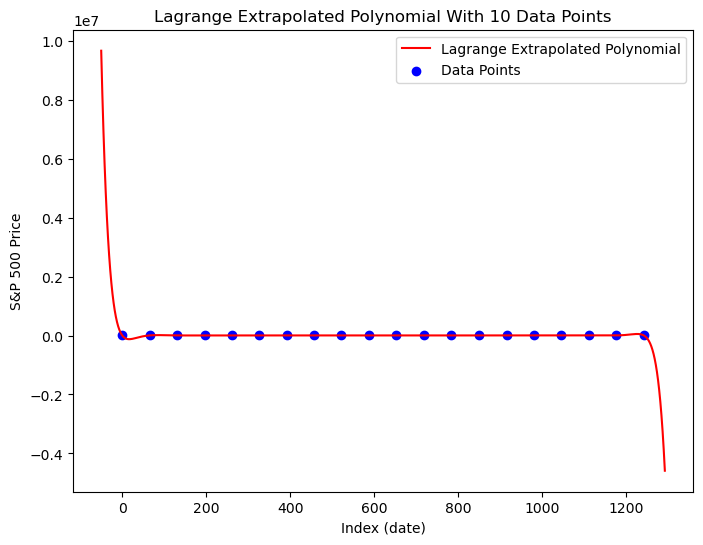

In [6]:
#Lagrange Polynomial Extrapolation
x_extrapolated = np.linspace(min(x_subset) - 50, max(x_subset) + 50, 1000)
y_extrapolated = lagrange_poly(x_extrapolated)


plt.figure(figsize=(8, 6))
plt.plot(x_extrapolated, y_extrapolated, label='Lagrange Extrapolated Polynomial', color='red')
plt.scatter(x_subset, y_subset, color='blue', label='Data Points')
plt.title('Lagrange Extrapolated Polynomial With 10 Data Points')
plt.xlabel('Index (date)')
plt.ylabel('S&P 500 Price')
plt.savefig('Lagrange20exp.JPEG')
plt.legend()
plt.show()

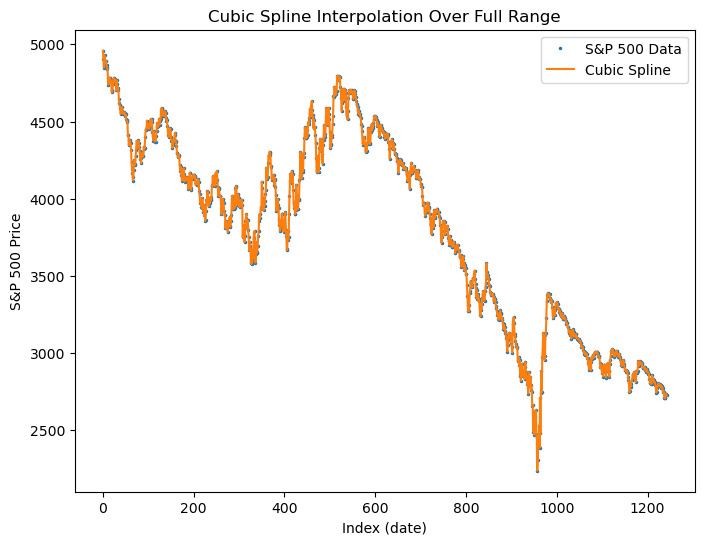

In [7]:
#Cubic Spline Interpolation
from scipy.interpolate import CubicSpline

x = np.arange(len(sp500))
y = sp500.values

cubic_spline = CubicSpline(x, y)


x_pts = np.linspace(x.min(), x.max(), 20)
y_pts = cubic_spline(x)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label = 'S&P 500 Data', markersize = 1.5)
plt.plot(x, y_pts, label = 'Cubic Spline')
plt.title('Cubic Spline Interpolation Over Full Range')
plt.xlabel('Index (date)')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.savefig('CubicsplineFull.JPEG')
plt.show()

#coeffs = cubic_spline.c

# Display the polynomial equations for each interval
#for i in range(len(x_pts) - 1):
 #   d_i, c_i, b_i, a_i = coeffs[:, i]
  #  print(f"S_{i}(x) = {a_i} + {b_i}*(x - {x[i]}) + {c_i}*(x - {x[i]})**2 + {d_i}*(x - {x[i]})**3")


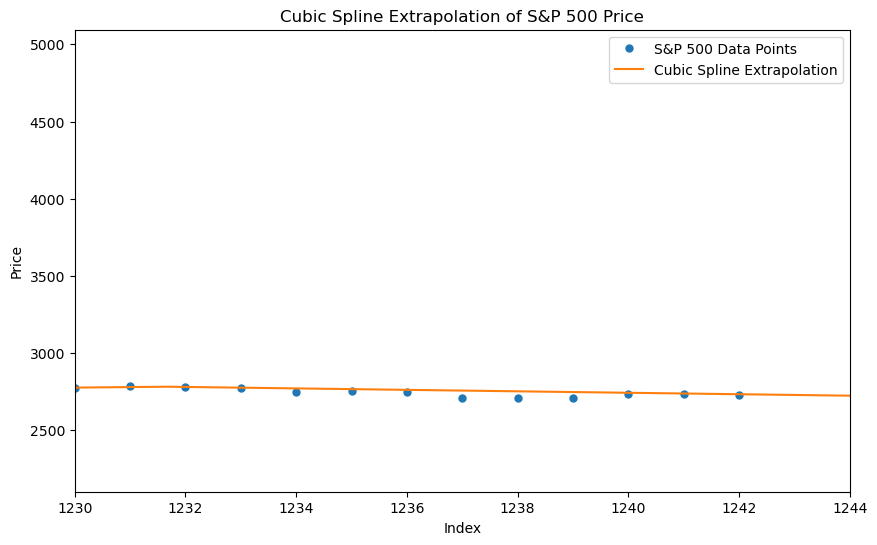

In [8]:
# Cubic Spline Extrapolation
x_min = x.min()  
x_max = x.max()  
extrapolate_by = 2  
x_extended = np.linspace(x_min, x_max + extrapolate_by, 100 + extrapolate_by)  
xzoom = 1230

y_extended = cubic_spline(x_extended)


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='S&P 500 Data Points',  markersize = 5)
plt.plot(x_extended, y_extended, label='Cubic Spline Extrapolation')
plt.title('Cubic Spline Extrapolation of S&P 500 Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.xlim([xzoom, x_extended.max()])

plt.savefig('CubicsplineExp20.JPEG')
plt.show()



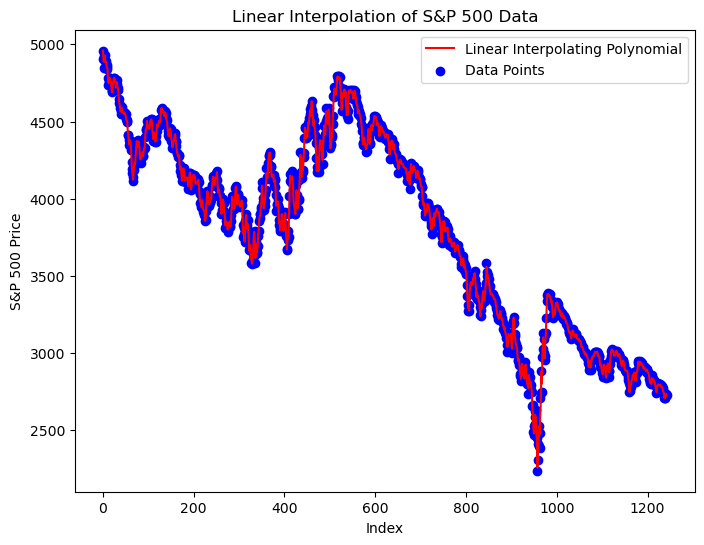

In [13]:
#Linear interpolation
from scipy.interpolate import interp1d
linear_interp = interp1d(x, y, kind = 'linear')

x_a = np.linspace(min(x), max(x), num=1000)
y_a = linear_interp(x_a)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x_a, y_a, label='Linear Interpolating Polynomial', color='red')
plt.scatter(x, y, color='blue', label='Data Points')
plt.title('Linear Interpolation of S&P 500 Data')
plt.xlabel('Index')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.show()


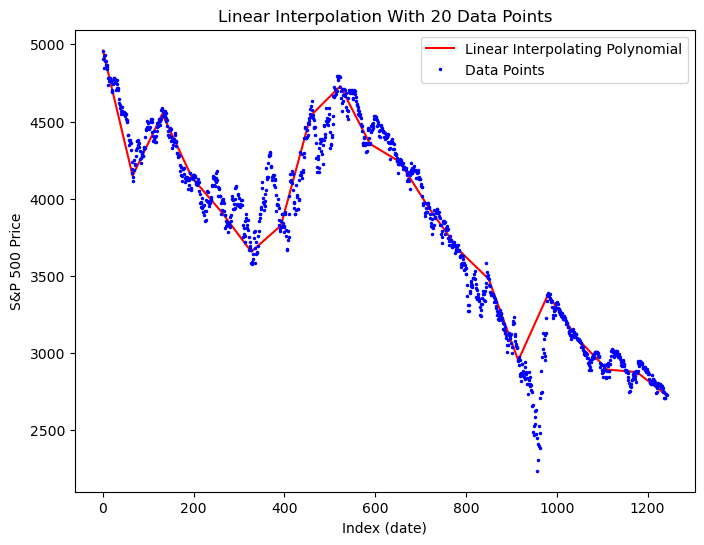

In [18]:
#Linear interpolation with less points
linear_interp = interp1d(x, y, kind = 'linear')

x_a = np.linspace(min(x), max(x), 20)
y_a = linear_interp(x_a)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x_a, y_a, label='Linear Interpolating Polynomial', color='red', markersize = 1.5)
plt.plot(x, y, 'o', color='blue', label='Data Points', markersize = 1.5)
plt.title('Linear Interpolation With 20 Data Points')
plt.xlabel('Index (date)')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.savefig('linearAll.JPEG')
plt.show()



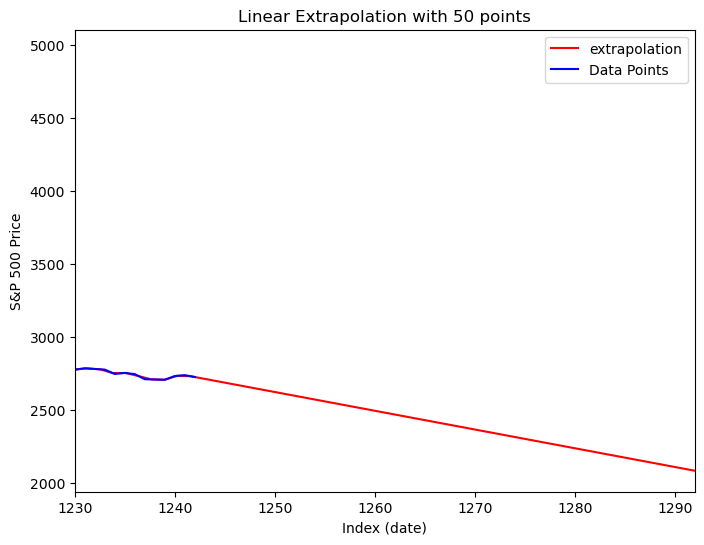

In [24]:
#Linear extrapolation
linear_extra = interp1d(x, y, kind='linear', fill_value="extrapolate")
xzoom = 1230

x_extended = np.linspace(min(x), max(x) + 50, 1000)  # 50 beyond the interpolation range. 
y_extended = linear_extra(x_extended)

plt.figure(figsize=(8, 6))
plt.plot(x_extended, y_extended, label='extrapolation', color='red')
plt.plot(x, y, color='blue', label='Data Points', markersize =1.5)
plt.title('Linear Extrapolation with 50 points')
plt.xlabel('Index (date)')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.xlim([xzoom, x_extended.max()])
plt.savefig('LinearExt50.JPEG')
plt.show()
